<a href="https://colab.research.google.com/github/ARavinduSilva/Final-Year-Project/blob/Hyper-Parameter-Tuning-Accuracy-Check/FinalFYP(85_15)Aug_HPT(Adam-0.001).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import load_img  # Import load_img from tensorflow.keras.utils
from tensorflow.keras.utils import img_to_array # Import img_to_array from tensorflow.keras.utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [5]:
image_directory = '/content/drive/MyDrive/FYP_Folder/FinalDataSet'

# Create a list of categories (subdirectories)
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    # Check if the item is a directory before proceeding
    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        for img_file in image_files:
            img_path = os.path.join(category_path, img_file)
            # Check if the item is a file before opening
            if os.path.isfile(img_path):
                print(f"Loading image: {img_path}") # Print the path of each image being loaded
                img = load_img(img_path, target_size=(48, 48), color_mode='grayscale') # Use color_mode='grayscale'
                img = img_to_array(img)
                img /= 255.0
                X.append(img)
                y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (115).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (106).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (130).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (108).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (123).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (102).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (113).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (101).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (125).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSet/brown_spot/brown_spot (126).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/FinalDataSe

In [6]:
print(f'The No of Sub-directories {len(os.listdir(image_directory))} ')
print()
images = 0
for dir in os.listdir(image_directory):
    subdir_path = os.path.join(image_directory, dir)

    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images += num_files
print()
print(f'Totol No of Images {images}')

The No of Sub-directories 6 

The No of Images inside the Sub-directory brown_spot: 448
The No of Images inside the Sub-directory bacterial_leaf_blight: 438
The No of Images inside the Sub-directory leaf_scald: 438
The No of Images inside the Sub-directory healthy: 438
The No of Images inside the Sub-directory leaf_blast: 438
The No of Images inside the Sub-directory narrow_brown_spot: 438

Totol No of Images 2638


In [7]:
print(f'The No of Sub-directories {len(os.listdir(image_directory))} ') # Use 'image_directory' instead of 'train'
print()
images_train = 0
for dir in os.listdir(image_directory): # Use 'image_directory' instead of 'train'
    subdir_path = os.path.join(image_directory, dir) # Use 'image_directory' instead of 'train'

    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images) * 100 }')
        images_train += num_files
print()
print(f'Totol No of Images {images_train}')

The No of Sub-directories 6 

The No of Images percentage inside the Sub-directory brown_spot: 16.982562547384383
The No of Images percentage inside the Sub-directory bacterial_leaf_blight: 16.603487490523122
The No of Images percentage inside the Sub-directory leaf_scald: 16.603487490523122
The No of Images percentage inside the Sub-directory healthy: 16.603487490523122
The No of Images percentage inside the Sub-directory leaf_blast: 16.603487490523122
The No of Images percentage inside the Sub-directory narrow_brown_spot: 16.603487490523122

Totol No of Images 2638


The No of Sub-directories 6 

The No of Images percentage inside the Sub-directory brown_spot: 16.982562547384383
The No of Images percentage inside the Sub-directory bacterial_leaf_blight: 16.603487490523122
The No of Images percentage inside the Sub-directory leaf_scald: 16.603487490523122
The No of Images percentage inside the Sub-directory healthy: 16.603487490523122
The No of Images percentage inside the Sub-directory leaf_blast: 16.603487490523122
The No of Images percentage inside the Sub-directory narrow_brown_spot: 16.603487490523122

Total No of Images 2638



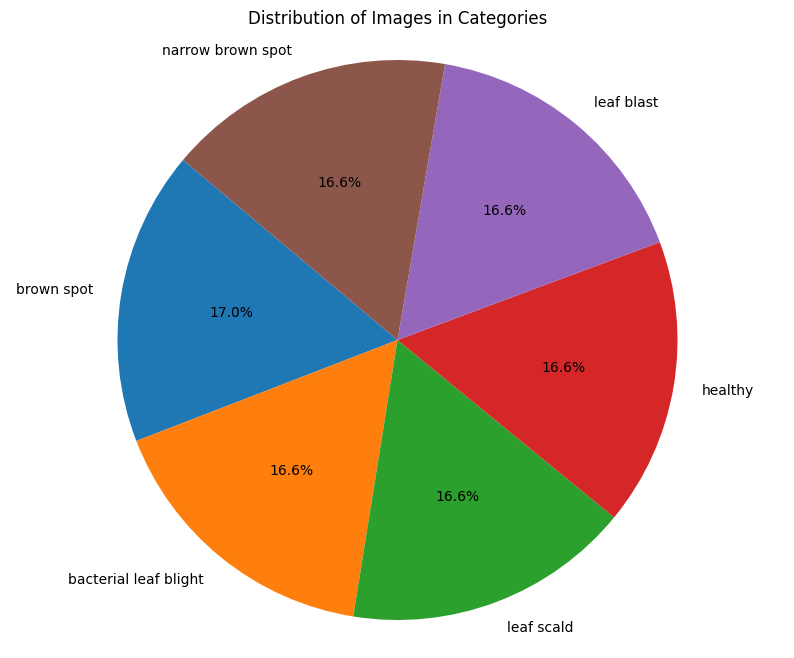

In [8]:
print(f'The No of Sub-directories {len(os.listdir(image_directory))} ') # Use 'image_directory' instead of 'train'
print()

images = 0
categories = []
percentages = []

for dir in os.listdir(image_directory): # Use 'image_directory' instead of 'train'
    subdir_path = os.path.join(image_directory, dir) # Use 'image_directory' instead of 'train'

    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        category_name = dir.replace('_', ' ')  # Optional: Replace underscores with spaces for better display
        categories.append(category_name)
        percentages.append((num_files / 11790) * 100)
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images_train) * 100 }')
        images += num_files

print()
print(f'Total No of Images {images}')

# Plotting the data
# Make sure you have imported matplotlib.pyplot as plt
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Images in Categories')
print()
plt.show()

In [9]:
!pip install scikeras

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [12]:
# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))  # Adjusted input shape to (48, 48, 1)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with the number of categories


# Define hyperparameters manually
optimizer = Adam(learning_rate=0.001)
batch_size = 32
epochs = 50
#dropout_rate = 0.2

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

#history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
#                   verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_paddy_micro.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 66s 840ms/step - accuracy: 0.1631 - loss: 1.8201 - val_accuracy: 0.1389 - val_loss: 1.7892
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - accuracy: 0.2682 - loss: 1.6899 - val_accuracy: 0.4167 - val_loss: 1.3569
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.4836 - loss: 1.2916 - val_accuracy: 0.5960 - val_loss: 1.0409
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 604ms/step - accuracy: 0.5299 - loss: 1.1682 - val_accuracy: 0.6111 - val_loss: 0.9801
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 570ms/step - accuracy: 0.6035 - loss: 0.9973 - val_accuracy: 0.6869 - val_loss: 0.8519
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 538ms/step - accuracy: 0.6223 - loss: 0.9904 - val_accuracy: 0.6667 - val_loss: 0.9072
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 567ms/step - accuracy: 0.6292 - loss: 0.9565 - val_accuracy: 0.6364 - val_loss: 0.9567
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 574ms/step - accuracy: 0.6723 - loss: 0.8688 - val_accuracy: 0.724

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


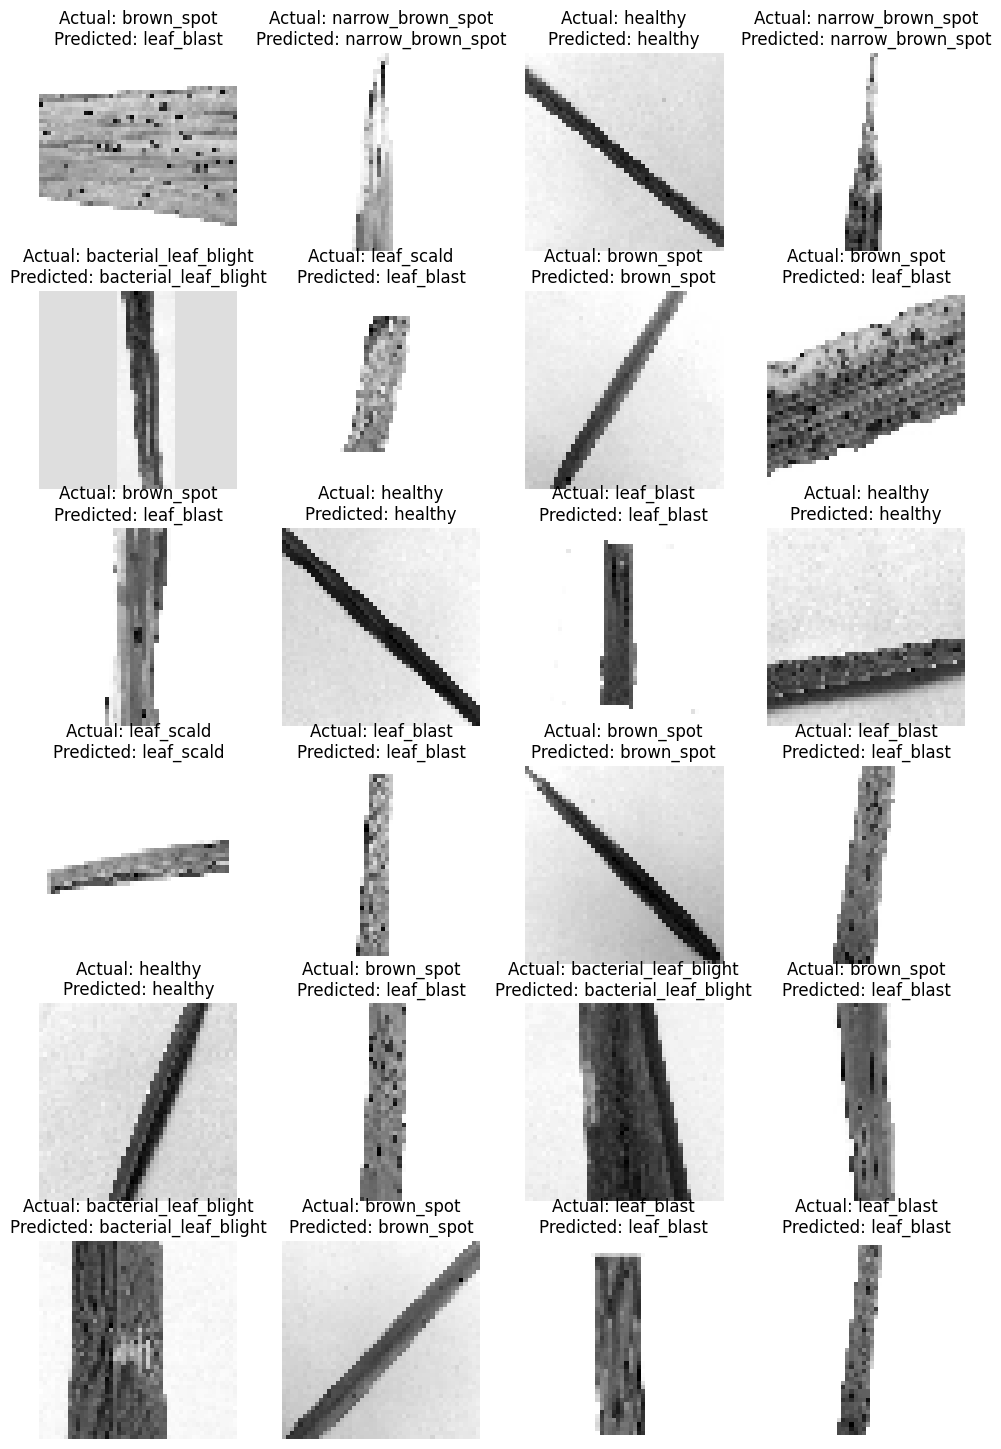

In [14]:


# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'leaf_blast']

plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 1), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()

In [15]:
# Get predictions
y_pred_probs = model.predict(X_val)  # Probabilities for each class, use X_val instead of val_ds
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class labels

# True labels (make sure they are in the same format as y_pred)
y_true = np.argmax(y_val, axis=1) # Assuming y_val is one-hot encoded, extract true labels

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step


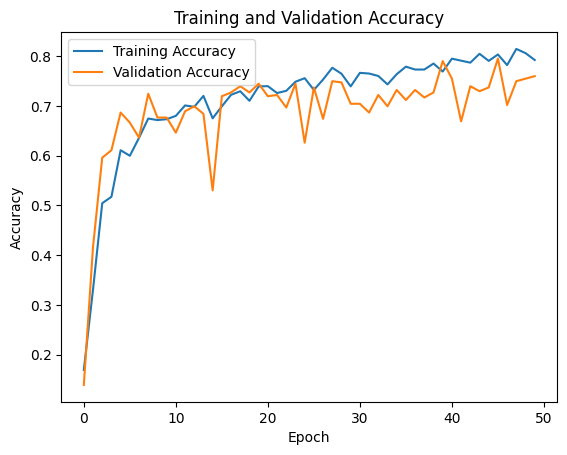

In [16]:
# Extract training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Or 'micro', 'weighted'
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.76010101010101
Precision: 0.7770238954755029
Recall: 0.7702699390597325
F1-score: 0.7562130861176267


In [18]:
# You can visualize the confusion matrix with a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix:
 [[72  0  0  0  0  1]
 [ 6 29  7 18  0 13]
 [ 0  2 46  7  0  0]
 [ 4  2 11 47  0  8]
 [ 0  1  0  0 47  4]
 [ 8  0  0  0  3 60]]


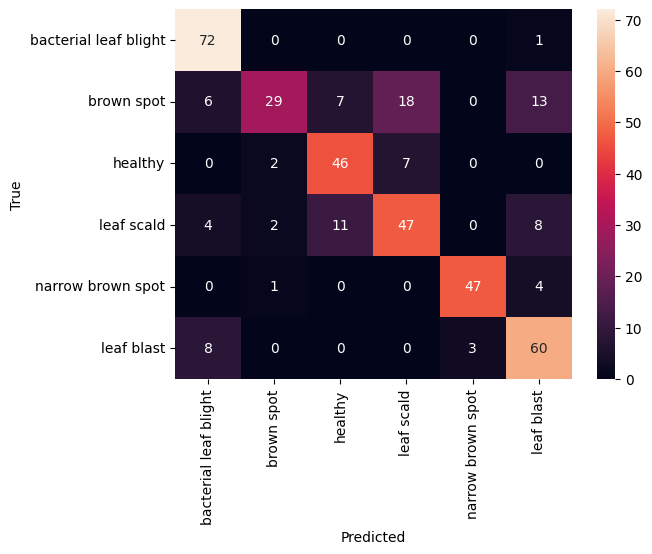

In [19]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)



# Assuming 'disease_names' is a list of disease names corresponding to the classes
disease_names = ['bacterial leaf blight', 'brown spot', 'healthy', 'leaf scald', 'narrow brown spot', 'leaf blast']  # Replace with your actual disease names

sns.heatmap(cm, annot=True, fmt='d', xticklabels=disease_names, yticklabels=disease_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

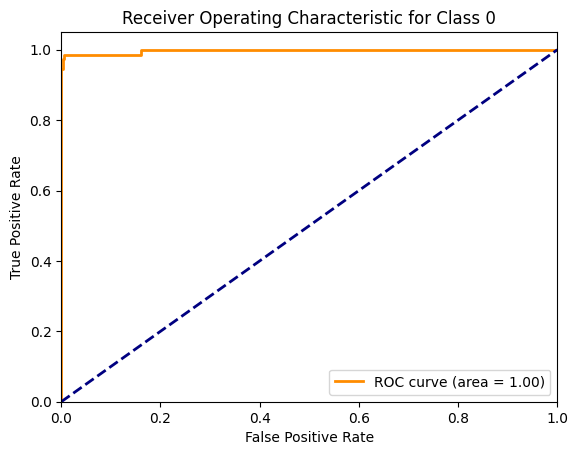

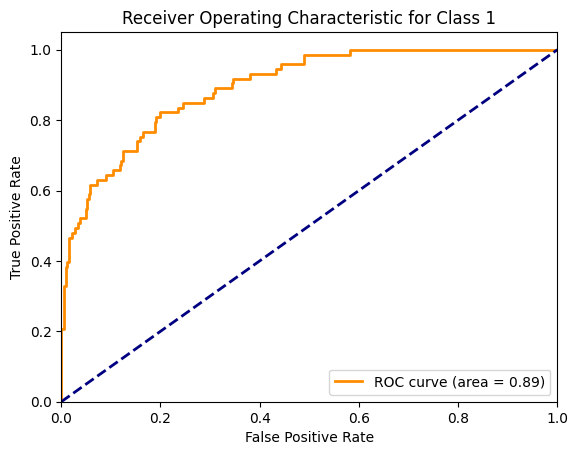

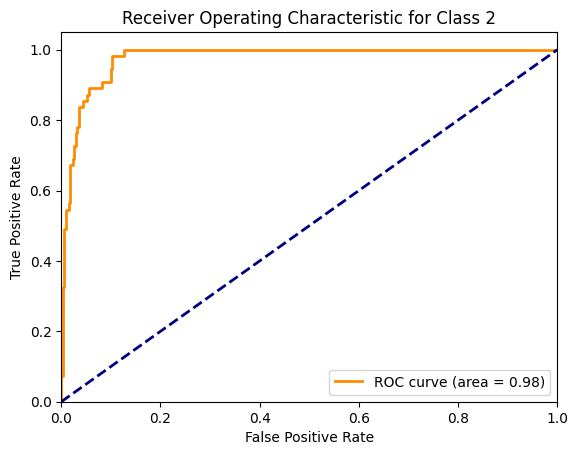

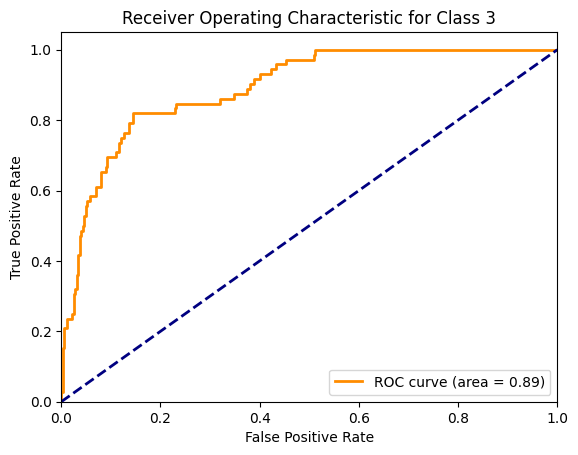

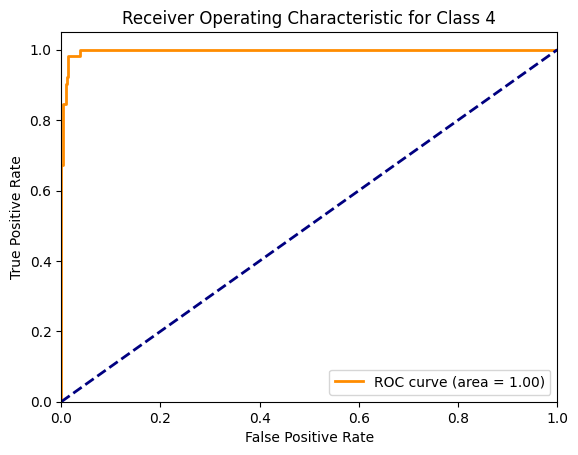

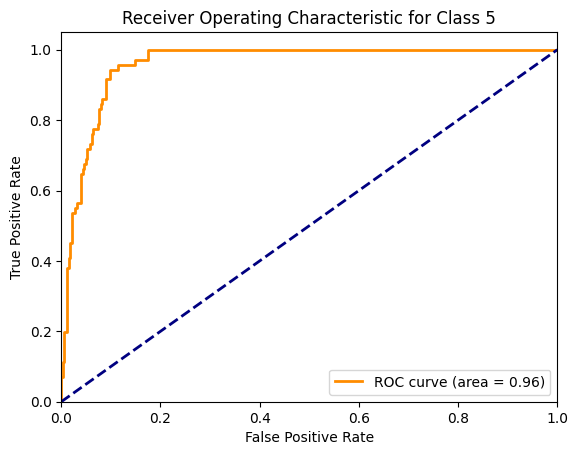

In [21]:


n_classes = y_pred_probs.shape[1]

for i in range(n_classes):
    # Treat class i as positive, rest as negative
    y_true_binary = (y_true == i).astype(int)
    y_score_binary = y_pred_probs[:, i]

    fpr, tpr, thresholds = roc_curve(y_true_binary, y_score_binary)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for Class {i}')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
disease_detection_rate = recall  # Same as recall for the positive class
false_alarm_rate = fpr[np.argmax(tpr - fpr)]  # Point on ROC curve closest to top-left corner

print("Disease Detection Rate (Sensitivity):", disease_detection_rate)
print("False Alarm Rate (False Positive Rate):", false_alarm_rate)

Disease Detection Rate (Sensitivity): 0.7702699390597325
False Alarm Rate (False Positive Rate): 0.09846153846153846


In [23]:
# Example using Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed
cv_accuracies = []
cv_precisions = []
# ... (other metrics)

# Make sure X and y_true have the same number of samples for cross-validation
X_cv = X[:len(y_true)]  # Adjust slicing as needed to match y_true length

for train_index, test_index in skf.split(X_cv, y_true):  # Use sliced X
    # ... (Train your model on train_index, evaluate on test_index)
    # ... (Calculate metrics for this fold)
    cv_accuracies.append(accuracy)
    cv_precisions.append(precision)
    # ...

print("Cross-validated Accuracy:", np.mean(cv_accuracies))
print("Cross-validated Precision:", np.mean(cv_precisions))
# ... (Print other cross-validated metrics)

Cross-validated Accuracy: 0.76010101010101
Cross-validated Precision: 0.7770238954755029


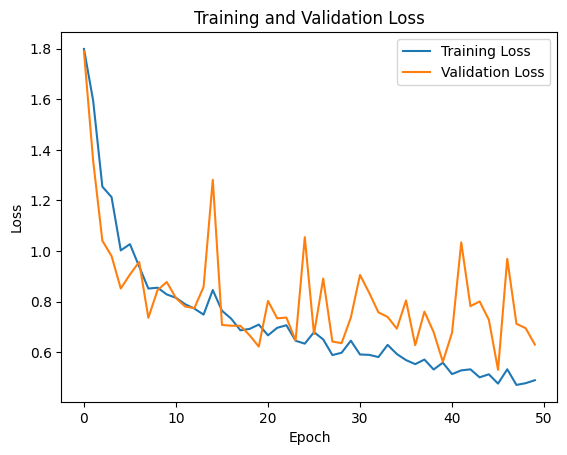

In [24]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
!pip install grad-cam




In [ ]:
from gradcam import GradCAM

# Assuming your model is already defined and trained

# Define GradCAM object for your model's last convolutional layer
gradcam = GradCAM(model, target_layer_name = "conv2d_3")  # Replace with your last convolutional layer name

# Get a sample image from your dataset
sample_image = X_test[0]  # Replace with your desired image index

# Preprocess the image as required by your model
sample_image = preprocess_image(sample_image)  # Implement your preprocessing function

# Generate heatmap
heatmap = gradcam(sample_image, y_pred_class=np.argmax(model.predict(np.expand_dims(sample_image, axis=0))))

# Visualize the heatmap on the original image (code depends on your visualization library)
visualize_heatmap(sample_image, heatmap)  # Implement your visualization function

ModuleNotFoundError: No module named 'gradcam'